In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

images/a.jpeg


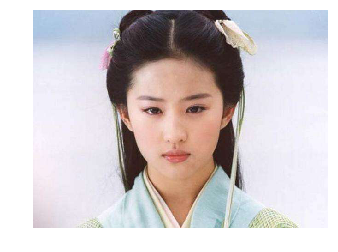

kimono score = 0.98886
pajama, pyjama, pj's, jammies score = 0.00310
stole score = 0.00064
apron score = 0.00047
envelope score = 0.00047
images/9661d8f0cb22c2527d0c621d107a651a.jpg


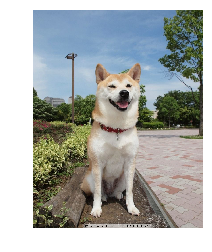

Pembroke, Pembroke Welsh corgi score = 0.66770
Cardigan, Cardigan Welsh corgi score = 0.05228
dingo, warrigal, warragal, Canis dingo score = 0.02012
Siberian husky score = 0.01744
Eskimo dog, husky score = 0.01004
images/d2a9fb0228d490f43d7985dc10298457.jpg


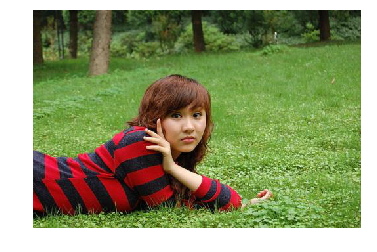

poncho score = 0.21468
soccer ball score = 0.17559
croquet ball score = 0.05076
swing score = 0.04492
ice lolly, lolly, lollipop, popsicle score = 0.03386
images/e7e1f6f0d4ef5cbb9c9c037a33663f5a.jpeg


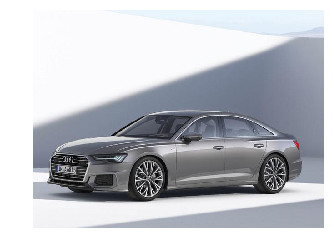

beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon score = 0.63164
car wheel score = 0.19737
sports car, sport car score = 0.03181
grille, radiator grille score = 0.01100
racer, race car, racing car score = 0.00767


In [2]:
class NodeLookup(object):
    def __init__(self):
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)
        
    def load(self, label_lookup_path, uid_lookup_path):
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_to_human = {}
        for line in proto_as_ascii_lines:
            line = line.strip()
            parsed_items = line.split('\t')
            uid = parsed_items[0]
            human_string = parsed_items[1]
            uid_to_human[uid] = human_string
            
            
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
        node_id_to_uid = {}
        for line in proto_as_ascii:
            if line.strip().startswith('target_class:'):
                target_class = int(line.strip().split(': ')[1].strip())
            elif line.strip().startswith('target_class_string:'):
                target_class_string = line.strip().split(': ')[1].strip()
                node_id_to_uid[target_class] = target_class_string[1:-1]
        
        node_id_to_name = {}
        for key, val in node_id_to_uid.items():
            name = uid_to_human[val]
            node_id_to_name[key] = name
        
        return node_id_to_name
    
    def id_to_string(self, node_id):
        if node_id not in self.node_lookup:
            return ''
        return self.node_lookup[node_id]

inception_graph_def_fiel = "inception_model/classify_image_graph_def.pb"

# 创建一个图来存放google训练好的模型
with tf.gfile.FastGFile(inception_graph_def_fiel, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

node_lookup = NodeLookup()

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    for root, dirs, files in os.walk('images/'):
        for file in files:
            image_data = tf.gfile.FastGFile(os.path.join(root, file), 'rb').read()
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})
            predictions = np.squeeze(predictions)
            
            image_path = os.path.join(root, file)
            print image_path
            
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            top_k = predictions.argsort()[-5:][::-1]
            for node_id in top_k:
                human_string = node_lookup.id_to_string(node_id)
                score = predictions[node_id]
                print "%s score = %.5f" %(human_string, score)


    
    
    
        
        
        
        
        
        
        